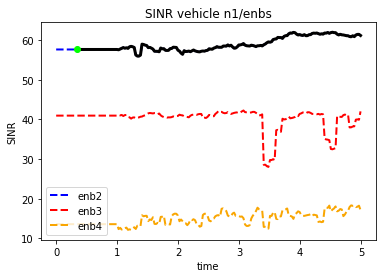

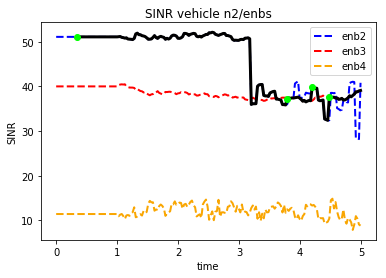

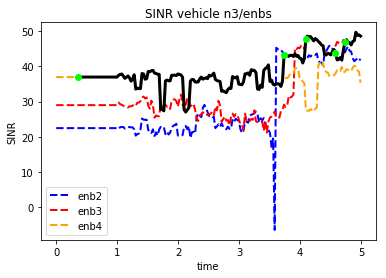

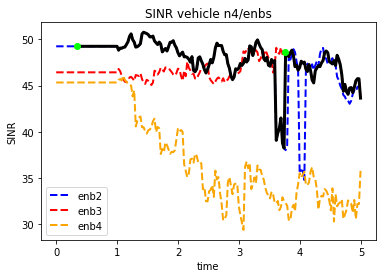

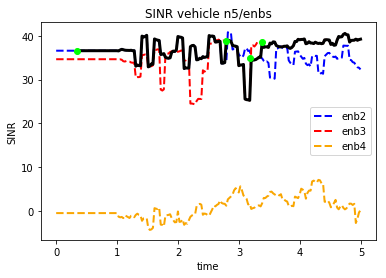

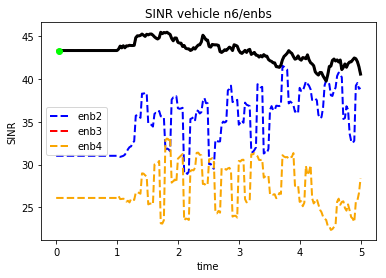

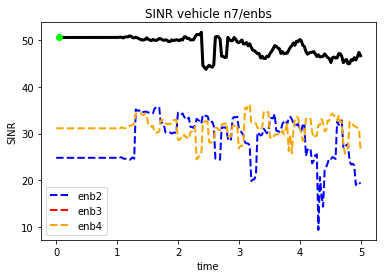

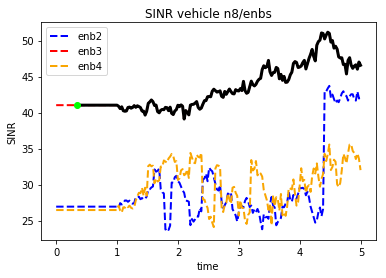

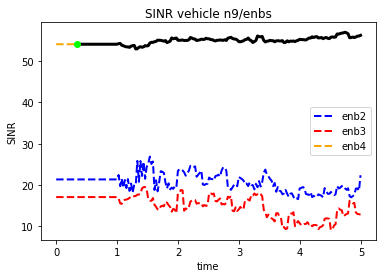

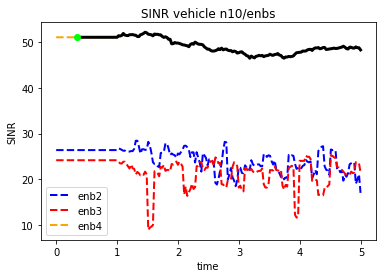

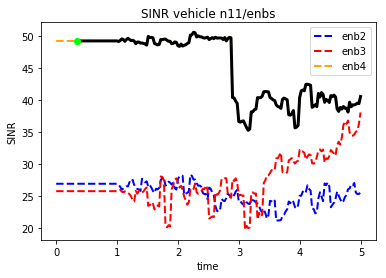

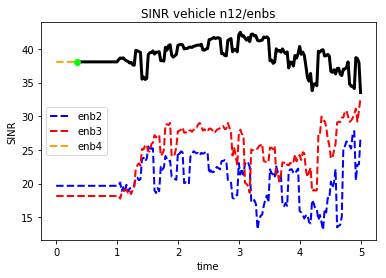

In [108]:
import numpy as np

file_sinr = "ns3-mmwave/output/mcMmWaveSinrTime_17_12_2017_06_28_56.txt"
infile = open(file_sinr,'r')
line_c = 0

num_vehicles = 12;
num_mmenbs = 3;
num_lines = 7056
num_records = num_lines/num_mmenbs/num_vehicles;

matrix = np.zeros((num_vehicles,num_mmenbs,num_records))
x = np.zeros(num_records)

for line in infile:
    v = line.split(' ')
    #print line
    veh = int(v[1])-1
    enb = int(v[2])-2
    matrix[veh,enb,line_c/num_mmenbs/num_vehicles] = v[3]
    if(line_c%(num_mmenbs*num_vehicles)==0):
        x[line_c/(num_mmenbs*num_vehicles)] = v[0]
    #print veh, enb, v[3]
    #print  matrix[veh,enb,line_c%num_vehicles]
    line_c += 1
infile.close()
#print x

file_switch = "ns3-mmwave/output/mcMmWaveSwitchStats_17_12_2017_06_28_56.txt"
infile = open(file_switch,'r')

ue_dicts = [dict() for i in range(num_vehicles)]

for line in infile:
    v = line.split(' ')
    ue = int(v[2]) - 1
    ue_dicts[ue][v[1]] = v[3]

infile.close()

from copy import deepcopy

#print ue_dicts
ue_dicts_copy = deepcopy(ue_dicts)

def find_index(key):
    for i in range(len(x)):
        if (x[i] >= float(key)):
            return i      
    return len(x)

x_ues = dict()
y_ues = dict()
#start_enbs = np.zeros(num_vehicles)

for i in range(num_vehicles):
    min_key = min(ue_dicts[i].keys())
    index = find_index(min_key)
    ue_dicts_copy[i][min_key] = matrix[i, int(ue_dicts[i][min_key])-2, index]
    #print index
    x_ues[i] = np.copy(x[index:])
    y_ues[i] = np.copy(matrix[i, int(ue_dicts[i][min_key])-2, index:])
    #print len(x_ues[i])
    #print len(y_ues[i])
    #start_enbs[i] = int()
    del ue_dicts[i][min_key]
    
#print ue_dicts
#print y_ues[1]


for i in range(num_vehicles):
    for key in ue_dicts[i].keys():
        min_key = min(ue_dicts[i].keys())
        index = find_index(min_key)
        ue_dicts_copy[i][min_key] = matrix[i, int(ue_dicts[i][min_key])-2, index]
        #print min_key
        #print index
        #print len(y_ues[i])
        #print len(matrix[i, int(ue_dicts[i][min_key])-2, index:])
        y_ues[i][index-(len(x)-len(y_ues[i])):] = (matrix[i, int(ue_dicts[i][min_key])-2, index:])
        #print len(y_ues[i])
        #print len(x_ues[i])
        del ue_dicts[i][min_key]
        
#print len(x)
#print matrix.shape[2]

import matplotlib.pyplot as plt

for i in range(num_vehicles):
    #to obtain control on the axis of the figure, so to customize labels, limits, etc.
    ax1 = plt.gca()
    #ax1.set_xlim(0, num_records)
    #set limit on y-axis
    #ax1.set_ylim(-0.1, 3)
    plt.title("SINR vehicle n"+str(i+1)+"/enbs")
    plt.xlabel("time")
    plt.ylabel('SINR')
    #x = range(0,num_records)
    plt.plot(x,matrix[i,0,:], '--', lw=2, color='b')
    plt.plot(x,matrix[i,1,:], '--', lw=2, color='r')
    plt.plot(x,matrix[i,2,:], '--', lw=2, color='#F9A602')
    plt.plot(x_ues[i],y_ues[i], lw=3, color='k')
    plt.plot(ue_dicts_copy[i].keys(),ue_dicts_copy[i].values(), 'o', lw=4, color='#00FF00')
    plt.legend(['enb2','enb3','enb4'])
    plt.show()